# Korean Bakery Sales - Preprocessing and Visualization 

I always love the smell that came out from a bakery. The scent of cinnamon, burnt chocolate, and sometimes a hint of a cup of coffee. All these fragrances never fail to tease me for stopping by.

My interest in bread baking made me curious to analyze the data that I found on [kaggle](https://www.kaggle.com/hosubjeong/bakery-sales). It is informed in the description that this data is transaction data of a bakery in South Korea.

After taking a peek at this dataset, I'm interested in finding out:
1. What is the best seller product in this Bakery?
2. How is the sales trend in this bakery?

I will be using Python and its packages such as pandas, numpy, and matplotlib to do data preprocessing and visualization in this project.

## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## 2. Importing Data

The data that we are using is a comma-separated value (csv) file named `Bakery Sales.csv`.


In [2]:
data = pd.read_csv("Bakery Sales.csv")
data

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

There are 2654 rows and 27 columns in the data. We can see that there are lots of NaN values, empty rows, and unnecessary columns. We need to clean the data first before processing it. 

## 3. Deleting Unnecessary Rows and Columns

To see the data that contains NaN values in all columns, we can apply:

In [4]:
data[data.isna().all(axis=1)]

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
2420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the table above, 233 empty rows filled with NaN starting from the 2420th row.

Therefore, we are going to re-extract the data until the 2419th row.

In [5]:
data = data.iloc[0:2420]

In [6]:
data

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,Sat,19500.0,동면,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2416,2020-05-02 11:39,Sat,19800.0,후평 1동,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2417,2020-05-02 12:15,Sat,14300.0,효자 2동,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,2020-05-02 13:45,Sat,15000.0,소양동,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some unnecessary columns are not used to answer our main question, like: day of week, total, and place. We are going to drop those three columns by:

In [7]:
data = data.drop(['day of week','place','total'], axis=1)

In [8]:
data

,datetime,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2416,2020-05-02 11:39,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2417,2020-05-02 12:15,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,2020-05-02 13:45,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Replace NaN Values With 0

We will replace NaN values with 0 because NaN values indicate that the product was not purchased in that transaction.

In [9]:
data = data.fillna(0)

In [10]:
data

,datetime,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-11 16:10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-12 11:49,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-13 13:19,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-07-13 13:22,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2416,2020-05-02 11:39,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2417,2020-05-02 12:15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,2020-05-02 13:45,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Formatting datetime Column


On the last data.info(), we can see that datetime column is still an object. We have to change it into datetime type.

In [11]:
data['datetime'] =  pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            2420 non-null   datetime64[ns]
 1   angbutter           2420 non-null   float64       
 2   plain bread         2420 non-null   float64       
 3   jam                 2420 non-null   float64       
 4   americano           2420 non-null   float64       
 5   croissant           2420 non-null   float64       
 6   caffe latte         2420 non-null   float64       
 7   tiramisu croissant  2420 non-null   float64       
 8   cacao deep          2420 non-null   float64       
 9   pain au chocolat    2420 non-null   float64       
 10  almond croissant    2420 non-null   float64       
 11  croque monsieur     2420 non-null   float64       
 12  mad garlic          2420 non-null   float64       
 13  milk tea            2420 non-null   float64     

In [12]:
data["datetime"] = data["datetime"].dt.date
data = data.rename(columns={'datetime':'date'})

Now, the data is already in datetime type and only contains dates from each datetime columns (YYYY-mm-dd).

## 6. Change It Into Daily Data

Since one date can contain several transactions, the data will be grouped by its date so it will be daily data. 

In [13]:
data = data.groupby('date').sum()

In [14]:
data

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
date,,,,,,,,,,,,,,,,,,,,,,,
2019-07-11,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2019-07-12,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-13,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
2019-07-14,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
2019-07-15,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
2020-04-29,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-04-30,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0


Now, theres only 249 rows and 23 columns in the data.

## 7. Add "total" Column

We will add a total column that contains the sum of products sold on that date.

In [15]:
data['total'] = data.sum(axis=1)

In [16]:
data

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,total
date,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-11,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0
2019-07-12,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2019-07-13,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,23.0
2019-07-14,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,43.0
2019-07-15,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,58.0
2020-04-29,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0
2020-04-30,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,29.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 2019-07-11 to 2020-05-02
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   angbutter           249 non-null    float64
 1   plain bread         249 non-null    float64
 2   jam                 249 non-null    float64
 3   americano           249 non-null    float64
 4   croissant           249 non-null    float64
 5   caffe latte         249 non-null    float64
 6   tiramisu croissant  249 non-null    float64
 7   cacao deep          249 non-null    float64
 8   pain au chocolat    249 non-null    float64
 9   almond croissant    249 non-null    float64
 10  croque monsieur     249 non-null    float64
 11  mad garlic          249 non-null    float64
 12  milk tea            249 non-null    float64
 13  gateau chocolat     249 non-null    float64
 14  pandoro             249 non-null    float64
 15  cheese cake         249 non-null    float64
 1

The data is clean already. Next, we will be able to make a chart to answer our main problems.

## 8. Best-Selling Products

In [18]:
product = data.sum(axis=0).sort_values()
product

mad garlic                0.0
croque monsieur           0.0
tiramisu                  7.0
lemon ade                38.0
merinque cookies         49.0
berry ade                55.0
cheese cake              92.0
milk tea                160.0
gateau chocolat         210.0
caffe latte             214.0
almond croissant        235.0
vanila latte            241.0
jam                     249.0
cacao deep              364.0
pandoro                 394.0
wiener                  476.0
americano               513.0
orange pound            566.0
pain au chocolat        726.0
tiramisu croissant      945.0
plain bread            1028.0
croissant              1049.0
angbutter              3229.0
total                 10840.0
dtype: float64

In [19]:
product = product.drop('total')

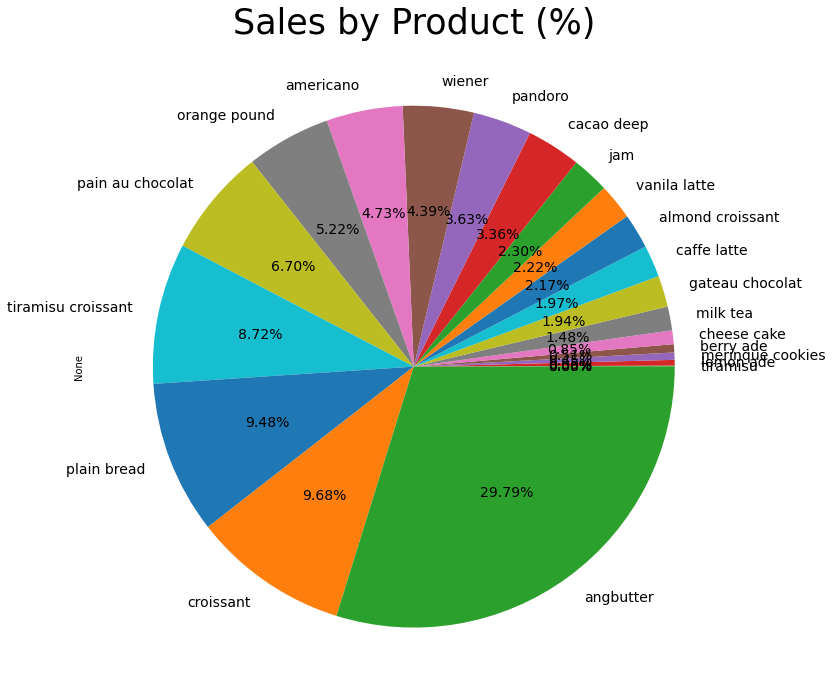

In [20]:
product.plot(kind='pie',
             fontsize=14,
             autopct=lambda p:f'{p:.2f}%',
             figsize=(15,12))
plt.title("Sales by Product (%)",fontsize=35)
plt.show()

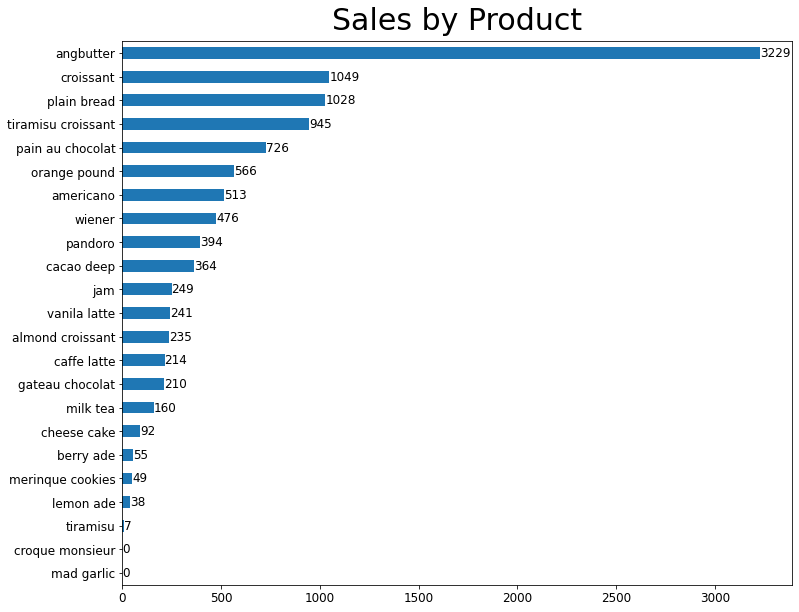

In [21]:
plot = product.plot(kind='barh',figsize=(12,10),fontsize=12)
plot.set_title("Sales by Product", fontsize=30, y=1.01)
for i in plot.patches:
    plot.text(i.get_width()+.1, i.get_y()+.10, \
            str(round((i.get_width()))), fontsize=12, color='black')
plt.show()

## 9. Sales Trend

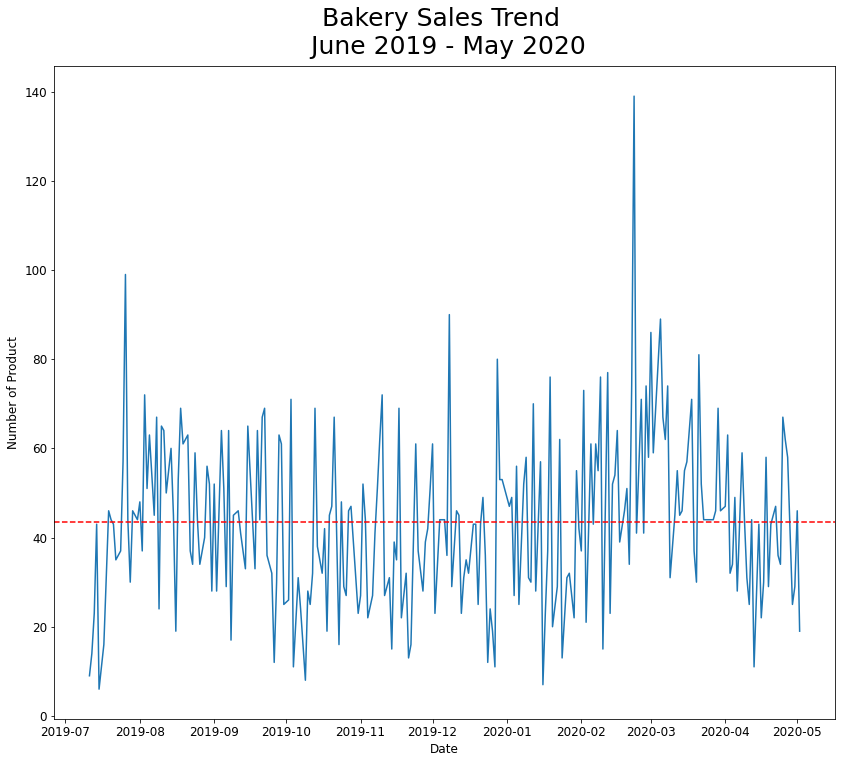

In [22]:
data['total'].plot(kind='line', figsize=(14,12),fontsize=12)
plt.axhline(y=data['total'].mean(), linestyle='--',color='r')
plt.title("Bakery Sales Trend \n June 2019 - May 2020",fontsize=25,y=1.01)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Product", fontsize=12)
plt.show()

# Conclusion

1. The data that we obtained from Kaggle was raw data so we need to preprocess it first. There are six steps in preprocessing the data: deleting unnecessary rows & columns, replace NaN values with 0, change the datetime data type, combining rows that are on the same date, and make a "total" column that contains the sum of products sold.

2. The best-selling product in that bakery was angbutter which was sold 3.229 pieces or 29.79% of the total sales. There are also other best-selling products such as croissant, plain bread, and tiramisu croissant.

3. Sales trend at the bakery are unstable but still around average. There was a significant increase in sales during March 2020 but dropped again after that.